For the BaggingClassifier() method, perform similar calculations as in class (crosvalidation with GridSearchCV() for 2, 5, 10, 20, 30, 50, and 100 classifiers), but use knn as the base classifier. The optimal value of the nn parameter should be found using grid search. The iris set should be used.

In [8]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

1. iris dataset

In [9]:
iris= datasets.load_iris()
X=iris.data
y=iris.target

In [10]:
# splitting dataset 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

2. clf score for nn=1

In [11]:
# using Knn classifier 
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train);
full_test = clf.score(X_test, y_test)
print("nn=1 PU:", full_test)

nn=1 PU: 0.9473684210526315


3. looking for optimal nn value

In [12]:
param_grid = {'n_neighbors': range(2, 22)}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, param_grid)
clf_grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 22)})

Text(0, 0.5, 'classifier result')

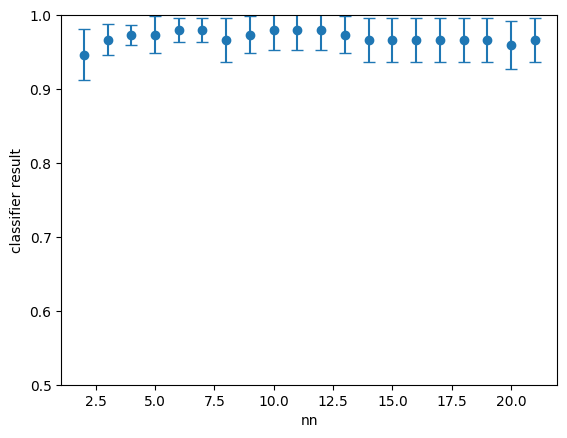

In [13]:
plt.errorbar(param_grid["n_neighbors"], clf_grid.cv_results_["mean_test_score"], clf_grid.cv_results_["std_test_score"], fmt="o", capsize=4)
plt.ylim(0.5, 1)
plt.xlabel('nn')
plt.ylabel('classifier result')

In [14]:
print(clf_grid.best_params_, clf_grid.best_score_)

clf_opt = KNeighborsClassifier(n_neighbors = 6)
clf_opt.fit(X_train, y_train)
opt_test = clf_opt.score(X_test, y_test)
print("Chosen knn:", opt_test)

{'n_neighbors': 6} 0.9800000000000001
Chosen knn: 0.9736842105263158


4. Bagging using knn

In [20]:
grid_params = {"n_estimators": [2, 5, 10, 20, 30, 50,100,]}
clf_bag = BaggingClassifier(KNeighborsClassifier(n_neighbors = 6))
clf_bag_grid = GridSearchCV(clf_bag, grid_params)
clf_bag_grid.fit(X, y)

GridSearchCV(estimator=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=6)),
             param_grid={'n_estimators': [2, 5, 10, 20, 30, 50, 100]})

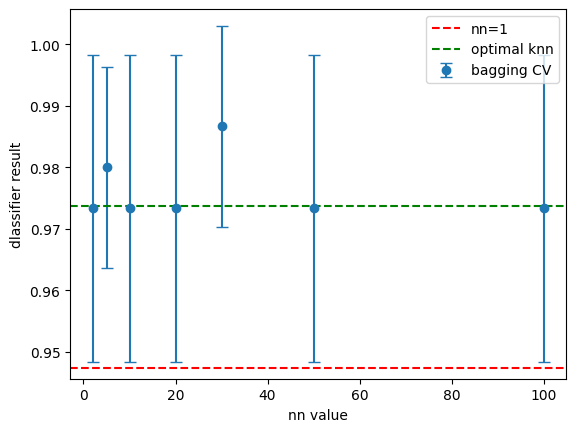

In [19]:
plt.errorbar(grid_params["n_estimators"], clf_bag_grid.cv_results_["mean_test_score"], clf_bag_grid.cv_results_["std_test_score"], fmt="o", capsize=4, label = "bagging CV")
plt.axhline(full_test, ls = "--", color = "red", label = "nn=1")
plt.axhline(opt_test, ls = "--", color = "green", label = "optimal knn")
plt.ylabel('dlassifier result')
plt.xlabel('nn value')
plt.legend()